# Exercise 1: Introduction to Python, Numpy and image manipulation

## 1. Install dependencies

Run the commands below to install the dependencies

In [1]:
import sys
!{sys.executable} -m pip install pillow matplotlib rasterio scikit-image scikit-learn

  Using cached Pillow-8.3.2-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached rasterio-1.2.6-cp38-cp38-macosx_10_9_x86_64.whl (20.5 MB)
  Using cached scikit_image-0.18.3-cp38-cp38-macosx_10_9_x86_64.whl (13.0 MB)
  Using cached numpy-1.21.2-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached affine-2.3.0-py2.py3-none-any.whl (15 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached PyWavelets-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl (4.3 MB)
  Using cached tifffile-2021.8.30-py3-none-any.whl (171 kB)
  Using cached networkx-2.6.2-py3-none-any.whl (1.9 MB)
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)


## 2. Read images
Download the Sentinel-2 images from [here](https://drive.google.com/file/d/1UOolKG3DA5HpDjXy7x7zrYCmY1RmjGlx/view?usp=sharing). Read the images using the function ***open*** of the ***rasterio*** library

In [15]:
import rasterio
# TODO: Use the library rasterio to read the images
band2 = rasterio.open("sentinel_imagery/band2.jp2")
band3 = rasterio.open("sentinel_imagery/band3.jp2")
band4 = rasterio.open("sentinel_imagery/band4.jp2")
band8 = rasterio.open("sentinel_imagery/band8.jp2")

## 3. Save multi-band images on tif files, and visualize them

Use the function below to save, in ***tif*** files, the following images:
- Natural color image
- False color composite image 
    - Near infrared → Red
    - Red → Green
    - Green → Blue

In [16]:
def save_multiband_image(output_path, 
                         red_arr, green_arr, blue_arr, 
                         crs, transform, data_type):
    """
    Save geo-located image, with 3 bands, in a .tif file
    
    Parameters
    ==================
    output_path: str
        Output file path with .tif extension
    red_arr: 2D numpy array
        Numpy array for the red band
    green_arr: 2D numpy array
        Numpy array for the green band
    blue_arr: 2D numpy array
        Numpy array for the blue band
    crs:
        Coordinate reference system
    transform:
        Rasterio transform
    data_type:
        Image data type
    """
    
    metadata = {
        "driver":'Gtiff',
        "width":red_arr.shape[1], 
        "height":red_arr.shape[0],
        "count":3,
        "crs":crs,
        "transform":transform,
        "dtype":data_type
    }
    
    with rasterio.open(output_path, 'w', **metadata) as image:
        image.write(red_arr,1)
        image.write(green_arr,2)
        image.write(blue_arr,3)


# We can use one of the rasterio objects to obtain
# the reference system (crs), transform, and data_type
crs = band4.crs
transform = band4.transform
data_type = band4.dtypes[0]

# TODO: get the numpy arrays from the rasterio objects
band2_array = band2.read(1)
band3_array = band3.read(1)
band4_array = band4.read(1)
band8_array = band8.read(1)

# TODO: Save natural color image using the function save_multiband_image
save_multiband_image("ex1_multiband_natural_color.tif",
                    band4_array, band3_array, band2_array,
                    crs, transform, data_type)

# TODO: Save the false color composite image using the function save_multiband_image
save_multiband_image("ex1_multiband_false_color.tif",
                    band8_array, band4_array, band3_array,
                    crs, transform, data_type)

Visualize the images using the ***matplotlib*** (normalize them first)

In [17]:
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def get_normalized_image(image, percentiles=(2, 98)):
    """
    Rescale image to values between 0 to 255 (capping outlier values) 
    
    Parameters
    ==================
    image: Numpy array
        Image numpy array with shape (height, width, num_bands)
    
    percentiles: tuple
        Tuple of min and max percentiles to cap outlier values
    
    Returns
    ==================
    output: Numpy array
        Normalized image numpy array
    
    """
    output = np.zeros_like(image)
    for k in range(image.shape[2]): # for each band
        p_min, p_max = np.percentile(image[:, :, k], percentiles)
        output[:, :, k] = exposure.rescale_intensity(image[:, :, k], 
                            in_range=(p_min, p_max), out_range=(0, 255))
    return output.astype(np.uint8)

# TODO: Read the images you saved. Use the function open of the rasterio library
natural_color = rasterio.open("ex1_multiband_natural_color.tif")
false_color_composite = rasterio.open("ex1_multiband_false_color.tif")

# Get numpy arrays 
natural_color_arr = natural_color.read()
false_color_composite_arr = false_color_composite.read()

# TODO: Reshape numpy arrays from (3, height, width) to (height, width, 3)
natural_color_arr = natural_color_arr.transpose(1 ,2, 0)
false_color_composite_arr = false_color_composite_arr.transpose(1 ,2, 0)

# TODO: normalize images for visualization
natural_color_arr = get_normalized_image(natural_color_arr)
false_color_composite_arr = get_normalized_image(false_color_composite_arr)

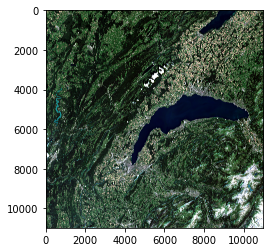

In [18]:
# TODO: visualize natural color image using matplotlib 
#       Note: before calling before calling plt.imshow() 
#             you can change the size of the visualized image using the command 
#             plt.figure(figsize = (6,6)) 
#             use the value of figsize that you prefer
plt.imshow(natural_color_arr)

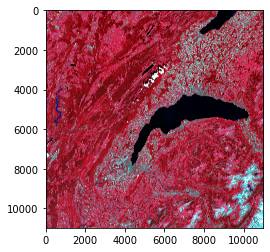

In [19]:
# TODO: visualize natural color image using matplotlib 
plt.imshow(false_color_composite_arr)

## 4. Crop images using bounding boxes

Crop the natural color image, and the false composite color image, using the following bounding boxes (coordinates in the reference system EPSG:32631)
- Region 1 → ***y_min***: 5138606, ***x_min***: 801822, ***y_max***: 5139540, ***x_max*** 802770
- Region 2 → ***y_min***: 5153426,  ***x_min***: 789153, ***y_max***: 5155320, ***x_max*** 791126

In [20]:
from rasterio.mask import mask

def crop_and_save_image(input_path, 
                        y_min, x_min, y_max, x_max, 
                        output_path):
    
    """
    Save a crop of the image delimited by bounding box coordinates
    and returns the numpy array of the cropped image, with shape (height, width, num_bands) 
    
    Parameters
    ==================
    input_path: str
        Path of the input image
    y_min: int
        Minimum vertical coordinate of the bounding box
    x_min: int
        Minimum horizontal coordinate of the bounding box
    y_max: int
        Maximum vertical coordinate of the bounding box
    x_max: int
        Maximum horizontal coordinate of the bounding box
    output_path: str
        Output file path, with extension .tif
    
    Returns
    ==================
    out_image:
        Numpy array of the cropped image, with shape (height, width, num_bands)
    
    """
    
    polygon_crop = [{"type": "Polygon", 
                 "coordinates": [[(x_min, y_max), 
                                  (x_max, y_max), 
                                  (x_max, y_min), 
                                  (x_min, y_min), 
                                  (x_min, y_max)]]}]
    
    with rasterio.open(input_path) as image:
        out_image, out_transform = mask(image, 
                                        polygon_crop, 
                                        crop=True, 
                                        all_touched=True)
        
        meta = image.meta.copy()
        meta["height"] = out_image.shape[1]
        meta["width"] = out_image.shape[2]
        meta["transform"] = out_transform

    with rasterio.open(output_path, "w", **meta) as output:
        output.write(out_image)
    
    return out_image.transpose(1, 2, 0)

In [21]:
# Bounding box coordinates of the Region 1 (coordinates in the reference system EPSG:32631)
region1_y_min = 5138606
region1_x_min = 801822
region1_y_max = 5139540
region1_x_max = 802770

# TODO: Use the function crop_and_save_image (defined above) to crop the Region 1,
#       in the natural color image, and the false color composite image,
#       using the bounding box coordinates defined above
#       Note the that the function outputs the numpy array of the cropped image already reshaped
region_1_natural_color_arr = crop_and_save_image("ex1_multiband_natural_color.tif",
                   region1_y_min, region1_x_min, region1_y_max, region1_x_max,
                   "ex1_region_1_multiband_natural_color.tif")
region_1_false_composite_color_arr = crop_and_save_image("ex1_multiband_false_color.tif",
                   region1_y_min, region1_x_min, region1_y_max, region1_x_max,
                   "ex1_region_1_multiband_false_color.tif")

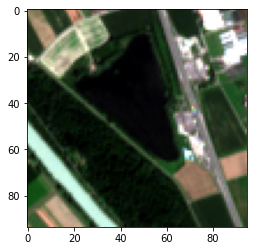

In [22]:
# TODO: Visualize Region 1 in natural color
plt.imshow(get_normalized_image(region_1_natural_color_arr))

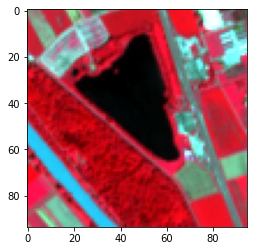

In [23]:
# TODO: Visualize Region 1 in false color composite
plt.imshow(get_normalized_image(region_1_false_composite_color_arr))

In [24]:
# Bounding box coordinates of the Region 2 (coordinates in the reference system EPSG:32631)
region2_y_min = 5153426
region2_x_min = 789153
region2_y_max = 5155320
region2_x_max = 791126

# TODO: Use the function crop_and_save_image (defined above) to crop the Region 2,
#       in the natural color image, and the false color composite image,
#       using the bounding box coordinates defined above
#       Note the that the function outputs the numpy array of the cropped image already reshaped


region_2_natural_color_arr = crop_and_save_image("ex1_multiband_natural_color.tif",
                   region2_y_min, region2_x_min, region2_y_max, region2_x_max,
                   "ex1_region_2_multiband_natural_color.tif")

region_2_false_composite_color_arr = crop_and_save_image("ex1_multiband_false_color.tif",
                   region2_y_min, region2_x_min, region2_y_max, region2_x_max,
                   "ex1_region_2_multiband_false_color.tif")

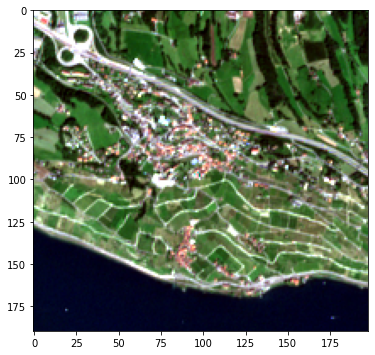

In [25]:
# TODO: Visualize Region 2 in natural color
plt.figure(figsize = (6,6))
plt.imshow(get_normalized_image(region_2_natural_color_arr))

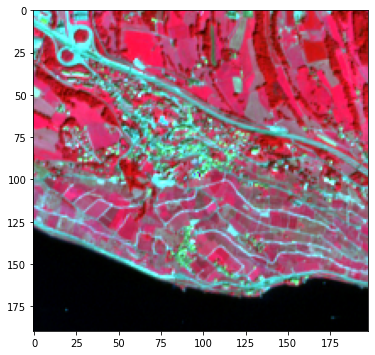

In [26]:
# TODO: Visualize Region 1 in false color composite
plt.figure(figsize = (6,6))
plt.imshow(get_normalized_image(region_2_false_composite_color_arr))

In [27]:
# TODO: Which is the shape of the numpy arrays of the two cropped regions?
print(region_1_natural_color_arr.shape)
print(region_2_natural_color_arr.shape)

(94, 95, 3)
(190, 198, 3)


In [28]:
# TODO: The spatial resolution of the images is 10m. 
#       What is the area in square meters covered by each of the two cropped regions?
print(region_1_natural_color_arr.shape[0]*region_1_natural_color_arr.shape[1]*10*10)
print(region_2_natural_color_arr.shape[0]*region_2_natural_color_arr.shape[1]*10*10)

893000
3762000


## 5. Answer the remaining questions of the PDF instructions file